# Data Science Project 1 - by VuTA12

### 1. Data gathering

#### a. dataset: 201902-fordgobike-tripdata.csv

The data is downloaded from Udacity, [Link](https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv)

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

### What is the structure of dataset?

> The dataset has 16 columns including duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip. Besides, there are 183412 entries, 0 to 183411.  

##### Questions

1. **How member age distribution**
2. **Is there any relationship between duration second and day of week**
3. **Is there any relationship between duration second and gender**

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("201902-fordgobike-tripdata.csv")
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
162843,379,2019-02-05 10:06:06.2230,2019-02-05 10:12:25.6790,231.0,14th St at Filbert St,37.808750,-122.283282,160.0,West Oakland BART Station,37.805318,-122.294837,3086,Subscriber,1989.0,Female,No
61379,317,2019-02-20 17:48:27.4120,2019-02-20 17:53:44.6770,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,383.0,Golden Gate Ave at Franklin St,37.780787,-122.421934,5467,Subscriber,1994.0,Male,No
40397,189,2019-02-22 21:00:44.9270,2019-02-22 21:03:53.9600,132.0,24th St at Chattanooga St,37.751819,-122.426614,137.0,Jersey St at Castro St,37.750506,-122.433950,4644,Subscriber,1992.0,Male,No
143072,176,2019-02-07 16:23:00.5670,2019-02-07 16:25:57.3760,223.0,16th St Mission BART Station 2,37.764765,-122.420091,96.0,Dolores St at 15th St,37.766210,-122.426614,4533,Subscriber,1987.0,Male,No
68126,600,2019-02-20 06:28:30.8720,2019-02-20 06:38:31.1060,304.0,Jackson St at 5th St,37.348759,-121.894798,312.0,San Jose Diridon Station,37.329732,-121.901782,6619,Subscriber,NaN,NaN,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [6]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

# Correct datatype of each column

As we can see within the schema, some columns is wrong datatype.

we need to convert those columns to right datatype

In [7]:
# start_time, end_time should be datetime.
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

# Id columns should be string
df.start_station_id = df.start_station_id.astype('str')
df.end_station_id = df.end_station_id.astype('str')
df.bike_id = df.bike_id.astype('str')

# user_type, member_gender should be category
df.user_type = df.user_type.astype('category')
df.member_gender = df.member_gender.astype('category')

# bike_share_for_all_trip should convert to boolean.
df.bike_share_for_all_trip = df.bike_share_for_all_trip.replace({"Yes": True, "No":False})
df.bike_share_for_all_trip = df.bike_share_for_all_trip.astype(bool)

df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       



### The main features of interest in your dataset?

> How do the gender, user type, user age affect on individual rides made in a bike-sharing system

**1. How member age distribution**

In [10]:
def visualize(df, col, hue, xlabel, ylabel, title):
    """
        df: dataframe
        col: column
        hue: column
        xlabel: label of x axis
        ylabel: label of y axis
        title: title of the chart.
        
        Return the chart histplot by col and hue
    """
    fig, ax = plt.subplots( figsize = (12,5), dpi = 100);
    sns.color_palette("hls", 8)
    sns.histplot(data=df, x= 2022 - df[col], bins=50, hue=hue);
    plt.xlim(0,110);
    plt.title(title, fontweight='bold');
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);

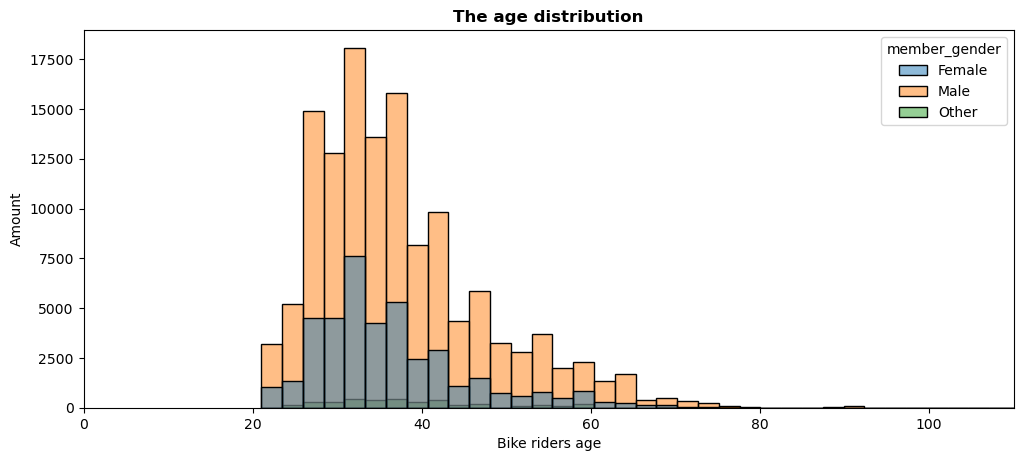

In [9]:
visualize(df, 'member_birth_year', 'member_gender', 'Bike riders age', 'Amount' ,'The age distribution')

**observation** Member age in range 20 - 45 is more than others. Besides, Male bike riders have the largest number of members in three of gender group (Female and Other)


Overall, Data has no outliers. However, the ratio of gender is quite different. For example, the ratio of male occur the largest part compared with female and other. And the age group focus on 20-45. Both issues will affect on our analysis.


Currently, positive-skewed distribution is happening in the dataset so I think we need to get the tail shortly in the distribution. 

**2. Is there any relationship between duration second and day of week**

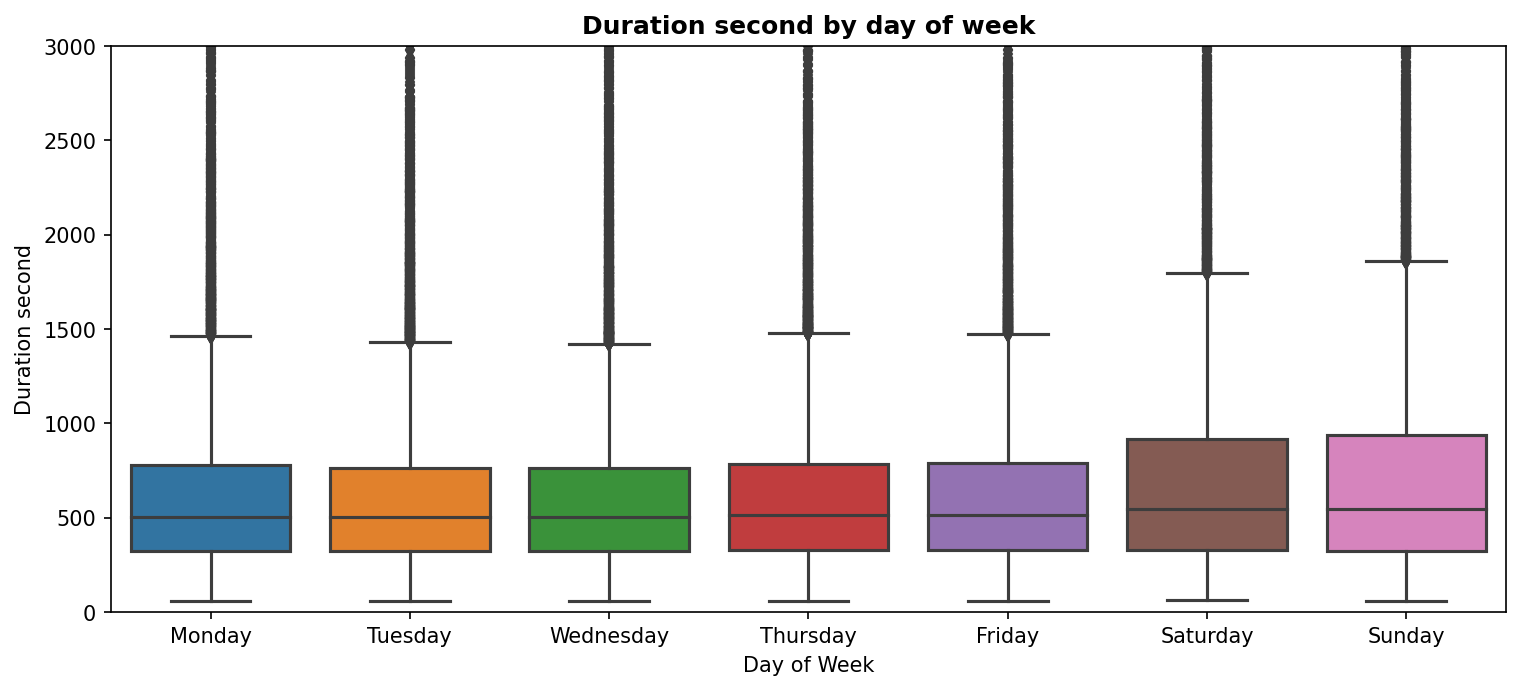

In [30]:
fig, ax = plt.subplots(figsize = (12,5), dpi = 150)
sns.boxplot(
    data=df, 
    x= df['start_time'].dt.day_name(),
    y='duration_sec',
    order=["Monday", "Tuesday","Wednesday", "Thursday", "Friday","Saturday","Sunday"]
)
plt.ylim([0,3000])
plt.title("Duration second by day of week", fontweight='bold')
plt.xlabel("Day of Week")
plt.ylabel("Duration second");

**observation** It seem like more trip in weekend than day week

**3. Is there any relationship between duration second and gender**

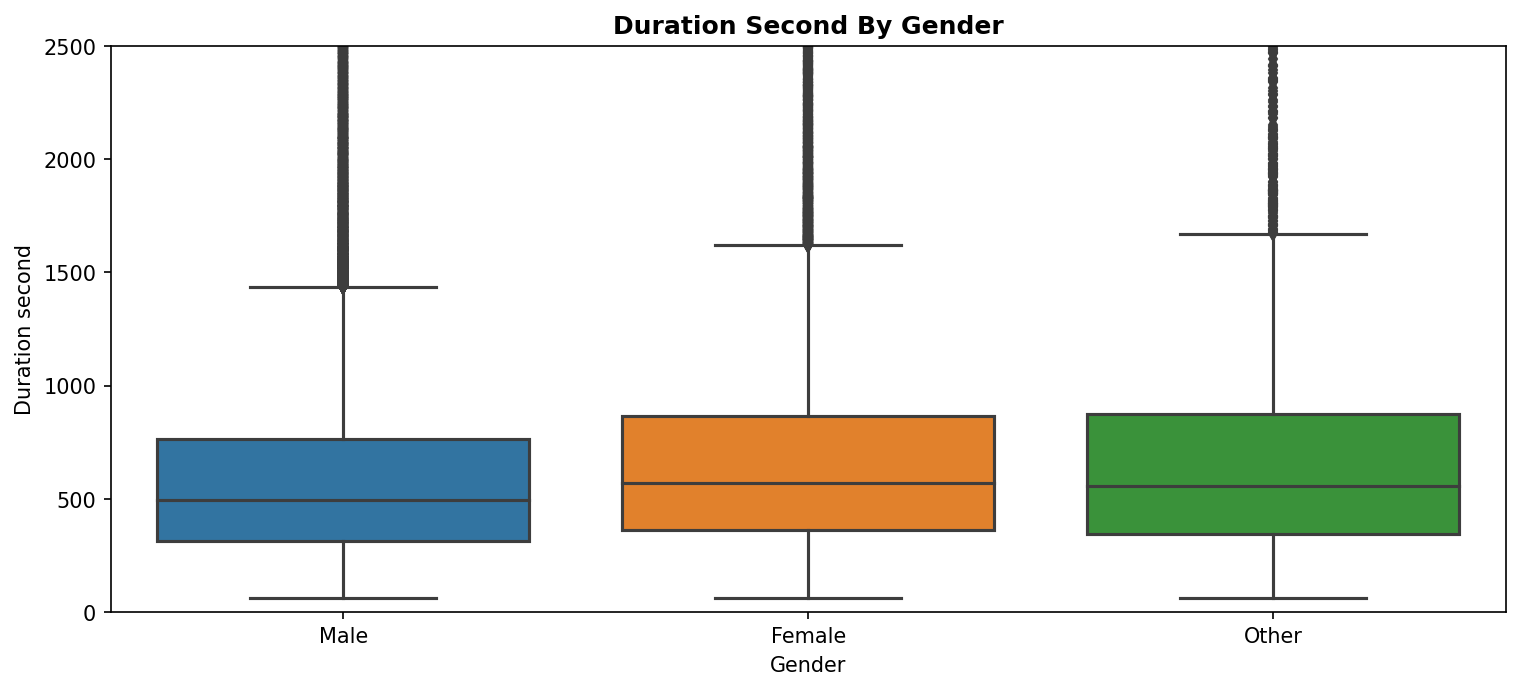

In [31]:
fig, ax = plt.subplots(figsize = (12,5), dpi = 150)
sns.boxplot(
    data=df, 
    x='member_gender',
    y='duration_sec',
    order=["Male","Female","Other"]
)
plt.ylim([0,2500])
plt.title("Duration Second By Gender", fontweight='bold')
plt.xlabel("Gender")
plt.ylabel("Duration second");

**observation** Although the Male is the most user, Female and Other is more trip than male.

In my opinion, in this dataset. Some values in datasets are more than another one, but when analyzed the trip is less affected by that


After I investigated that I think most user is tourists, because Customer trip duration is higher than subscriber.

## Conclusions
In conclusion, subcribers have a huge ratio so we need to have a strategy to convert them to our customers. Besides, age of riders are focusing on medium age (25-40) and living mainly in the South-east region. That helps us concentrate on the potential customer set to make suitable decisions.
